In [111]:
import numpy as np

In [112]:
import matplotlib.pyplot as plt

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  RandomForestClassifier
from sklearn import metrics

In [114]:
import numpy as np

In [115]:
import pandas as pd
import os
import glob

In [258]:
one_train = pd.read_csv("two_train_combine.csv")
one_test = pd.read_csv("two_test_combine.csv")

In [261]:
one_train

,Unnamed: 0_x,Horiz_acc,id_x,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,crest_horiz,...,peak_temp,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp,RUL_y,id
0,15369.0,0.238,1.0,0.026962,0.260338,0.509,0.256702,0.211157,-0.798134,1.982841,...,59.930,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0
1,15379.0,-0.303,1.0,0.014577,0.268270,0.509,0.263464,0.262493,-0.918790,1.931952,...,59.930,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0
2,15389.0,0.531,1.0,0.028538,0.285469,0.531,0.281376,0.308589,-1.007622,1.887154,...,59.930,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0
3,15399.0,-0.298,1.0,0.013115,0.292042,0.531,0.286670,0.398728,-1.052732,1.852301,...,59.930,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0
4,15409.0,-0.095,1.0,0.009231,0.292811,0.531,0.287273,0.436532,-1.051198,1.848417,...,59.930,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782331,5916119.0,-0.128,1.0,-0.004577,0.232897,0.346,0.228421,-0.008840,-1.529796,1.514750,...,112.374,112.351017,-0.262185,-0.579971,1.000205,1.000205,1.000000,1.000205,0.0,2.0
782332,5916129.0,0.066,1.0,0.002385,0.232169,0.346,0.227673,-0.100525,-1.507062,1.519726,...,112.374,112.351017,-0.262185,-0.579971,1.000205,1.000205,1.000000,1.000205,0.0,2.0
782333,5916139.0,0.028,1.0,0.015038,0.223786,0.346,0.219955,-0.188188,-1.390106,1.573047,...,112.374,112.351017,-0.262185,-0.579971,1.000205,1.000205,1.000000,1.000205,0.0,2.0
782334,5916149.0,-0.189,1.0,0.018308,0.219984,0.346,0.216487,-0.182705,-1.360011,1.598247,...,112.374,112.351017,-0.262185,-0.579971,1.000205,1.000205,1.000000,1.000205,0.0,2.0


In [262]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

one_train = clean_dataset(one_train)
one_test = clean_dataset(one_test)

In [263]:
one_train = one_train.reset_index()
one_test = one_test.reset_index()

### step 1 classification

In [264]:
imp_df = pd.read_csv("feature_selection_2.csv")

In [265]:
def two_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]/2,"time_group"] = 1
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [266]:
def three_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]/2) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.25),"time_group"] = 1
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.25,"time_group"] = 2
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [267]:
def four_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.5) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.25),"time_group"] = 1
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.25) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.125),"time_group"] = 2 
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.125,"time_group"] = 3
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [268]:
max_list = []
for i in range(1,int(one_train["id"].max())+1,1):
    one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
    one_id = one_id.reset_index()
    max_list.append(one_id.loc[0,"RUL_x"])

In [269]:
one_test

,index,Unnamed: 0_x,Horiz_acc,id_x,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,...,peak_temp,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp,RUL_y,id
0,0,25609.0,0.445,1.0,0.080846,0.505284,1.161,0.502024,0.030814,-0.597111,...,69.185,69.120956,-0.049059,-1.171330,1.000927,1.000927,1.0,1.000927,9000.1,1.0
1,1,25619.0,0.272,1.0,0.096462,0.504652,1.161,0.504166,-0.063969,-0.583935,...,69.185,69.120956,-0.049059,-1.171330,1.000927,1.000927,1.0,1.000927,9000.1,1.0
2,2,25629.0,0.597,1.0,0.132385,0.505804,1.161,0.513345,-0.225490,-0.558417,...,69.185,69.120956,-0.049059,-1.171330,1.000927,1.000927,1.0,1.000927,9000.1,1.0
3,3,25639.0,-1.381,1.0,0.052500,0.572807,1.161,0.564131,-0.539413,0.061838,...,69.185,69.120956,-0.049059,-1.171330,1.000927,1.000927,1.0,1.000927,9000.1,1.0
4,4,25649.0,1.514,1.0,0.116500,0.638472,1.514,0.636820,-0.195293,0.137653,...,69.185,69.120956,-0.049059,-1.171330,1.000927,1.000927,1.0,1.000927,9000.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230651,230651,2332119.0,-1.361,1.0,-0.201885,3.416126,8.724,3.355865,-1.205327,5.886948,...,103.208,103.176735,0.016580,-1.132239,1.000303,1.000303,1.0,1.000303,0.0,1.0
230652,230652,2332129.0,0.400,1.0,-0.185769,3.418011,8.724,3.356780,-1.218428,5.889320,...,103.208,103.176735,0.016580,-1.132239,1.000303,1.000303,1.0,1.000303,0.0,1.0
230653,230653,2332139.0,-0.472,1.0,-0.307769,3.367119,8.724,3.316045,-1.184010,6.243683,...,103.208,103.176735,0.016580,-1.132239,1.000303,1.000303,1.0,1.000303,0.0,1.0
230654,230654,2332149.0,1.158,1.0,-0.094000,3.272010,8.724,3.209846,-1.414265,7.594264,...,103.208,103.176735,0.016580,-1.132239,1.000303,1.000303,1.0,1.000303,0.0,1.0


In [270]:
time_list = []
for i in range(1,int(one_train["id"].max())+1,1):
    one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
    one_id = one_id.reset_index()
    print(one_id.loc[0,"RUL_x"])

7440.0996099999975
23100.09922


In [271]:
time_list = []
for i in range(1,int(one_test["id"].max())+1,1):
    one_id = one_test[one_test["id"]==i][["id","RUL_x"]]
    one_id = one_id.reset_index()
    print(one_id.loc[0,"RUL_x"])

9000.09961


In [272]:
def add_time(one_train):
    time_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id["time"] = one_id.loc[0,"RUL_x"] - one_id["RUL_x"] 
        time_list = time_list + list(one_id["time"].values)
    one_train["time"] = time_list
    return one_train

In [273]:
one_train = add_time(one_train)
one_test = add_time(one_test)

In [274]:
one_train = three_time_group(one_train)
one_test = three_time_group(one_test)

In [285]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

one_train = clean_dataset(one_train)
one_test = clean_dataset(one_test)

In [289]:
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["time_group"]
y_test = one_test["time_group"]

In [290]:
X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

In [286]:
X_train

,sd_vert,rms_horiz,f16,av_sum,sd_temp,sd_sum,sd_horiz,rms_vert,rms_sum,peak_temp,...,f160,f136_vert,f136_sum,f136,f120_vert,f120_sum,f112_sum,crest_temp,clear_temp,clear_sum
0,0.241837,0.256702,0.014733,0.309214,0.296811,0.167898,0.260338,0.238375,0.350313,59.930,...,0.105713,0.246370,0.246370,0.157777,0.177672,0.177672,0.182799,1.007421,1.007439,2.151020
1,0.234619,0.263464,0.016846,0.311088,0.296811,0.167722,0.268270,0.233262,0.351887,59.930,...,0.161555,0.182634,0.182634,0.218409,0.069795,0.069795,0.115048,1.007421,1.007439,2.137133
2,0.235153,0.281376,0.019149,0.324364,0.296811,0.178976,0.285469,0.238411,0.368798,59.930,...,0.188653,0.131297,0.131297,0.252626,0.033610,0.033610,0.085650,1.007421,1.007439,2.134635
3,0.237228,0.286670,0.021542,0.331876,0.296811,0.174029,0.292042,0.238920,0.373179,59.930,...,0.124923,0.130716,0.130716,0.237030,0.099921,0.099921,0.103595,1.007421,1.007439,2.070941
4,0.240850,0.287273,0.023964,0.336122,0.296811,0.172814,0.292811,0.243246,0.376423,59.930,...,0.014569,0.127396,0.127396,0.195018,0.124821,0.124821,0.114733,1.007421,1.007439,2.041361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782326,0.288051,0.228421,0.000000,0.335262,0.012546,0.142650,0.232897,0.282473,0.363272,112.374,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000205,1.000205,2.035088
782327,0.290182,0.227673,0.000000,0.338132,0.012546,0.139353,0.232169,0.284904,0.364699,112.374,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000205,1.000205,2.010859
782328,0.272650,0.219955,0.000000,0.319435,0.012546,0.140788,0.223786,0.269662,0.347991,112.374,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000205,1.000205,2.146626
782329,0.271910,0.216487,0.000000,0.315372,0.012546,0.142625,0.219984,0.268612,0.344992,112.374,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000205,1.000205,2.178509


In [287]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [279]:
from sklearn.metrics import mean_squared_error

In [280]:
def plot_features_weights(model, weights, feature_names):
    

    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W_df = W.sort_values(by='Weights', ascending=True)
    W_df.tail(10).plot(kind='barh', color='r', figsize=(px,py))
    plt.xlabel(model)
    plt.gca().legend_ = None

In [281]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    plt.figure(figsize=(20,10))
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=y_train.max()+50, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [282]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [283]:
from lightgbm import LGBMClassifier

In [291]:
rf = LGBMClassifier(n_estimators=20,reg_alpha=5)
rf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=5, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [292]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.807, accuracy testing: 0.500
F1 training: 0.803, F1 testing: 0.333


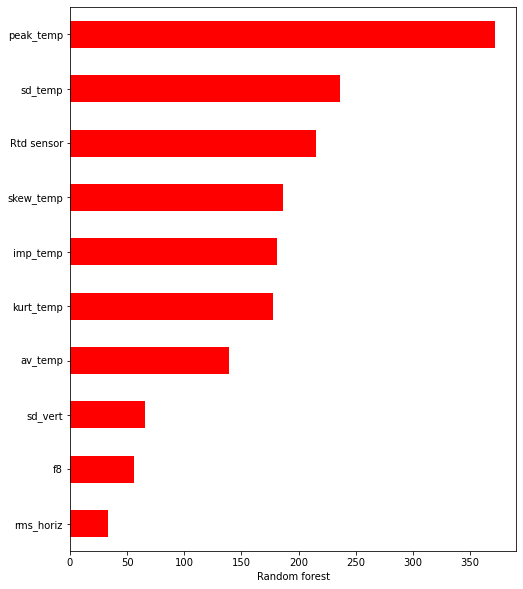

In [293]:
plot_features_weights('Random forest',rf.feature_importances_, X_train.columns)

In [294]:
ans_train = pd.DataFrame(y_train.values,columns=["real group"])
ans_train["pre_group(no time)"] = y_train_predict
ans_train["real_rul"] = one_train["RUL_x"]

In [295]:
ans_test = pd.DataFrame(y_test.values,columns=["real group"])
ans_test["pre_group(no time)"] = y_test_predict
ans_test["real_rul"] = one_test["RUL_x"]

In [296]:
ans_train["time"] = one_train["time"]
ans_test["time"] = one_test["time"]

In [190]:
ans_train

,real group,pre_group(no time),real_rul,time
0,0.0,0.0,7440.09961,0.00000
1,0.0,0.0,7440.09922,0.00039
2,0.0,0.0,7440.09883,0.00078
3,0.0,0.0,7440.09844,0.00117
4,0.0,0.0,7440.09805,0.00156
...,...,...,...,...
782331,2.0,2.0,0.00156,23100.09805
782332,2.0,2.0,0.00117,23100.09844
782333,2.0,2.0,0.00078,23100.09883
782334,2.0,2.0,0.00039,23100.09922


### 加入時間因素考量time group

In [232]:
X_train = ans_train[["time"]]
y_train = ans_train["real group"]
X_test = ans_test[["time"]]
y_test = ans_test["real group"]

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [235]:
y_test_predict = lr.predict(X_test)
y_train_predict = lr.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.692, accuracy testing: 0.500
F1 training: 0.641, F1 testing: 0.333


In [236]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [237]:
y_test_predict = dt.predict(X_test)
y_train_predict = dt.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.878, accuracy testing: 0.500
F1 training: 0.876, F1 testing: 0.333


In [192]:
X_train = ans_train[["pre_group(no time)","time"]]
y_train = ans_train["real group"]
X_test = ans_test[["pre_group(no time)","time"]]
y_test = ans_test["real group"]

In [193]:
X_train["pre_group(no time)"].value_counts()

0.0    415124
2.0    210366
1.0    156846
Name: pre_group(no time), dtype: int64

In [195]:
X_test["pre_group(no time)"].value_counts()

0.0    230655
1.0         1
Name: pre_group(no time), dtype: int64

In [196]:
pd.DataFrame(y_train)

,real group
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
782331,2.0
782332,2.0
782333,2.0
782334,2.0


In [197]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [198]:
y_test_predict = lr.predict(X_test)
y_train_predict = lr.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.799, accuracy testing: 0.500
F1 training: 0.789, F1 testing: 0.333


In [199]:
from sklearn.tree import DecisionTreeClassifier

In [200]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [201]:
y_test_predict = dt.predict(X_test)
y_train_predict = dt.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.941, accuracy testing: 0.500
F1 training: 0.942, F1 testing: 0.333


In [203]:
from sklearn import tree

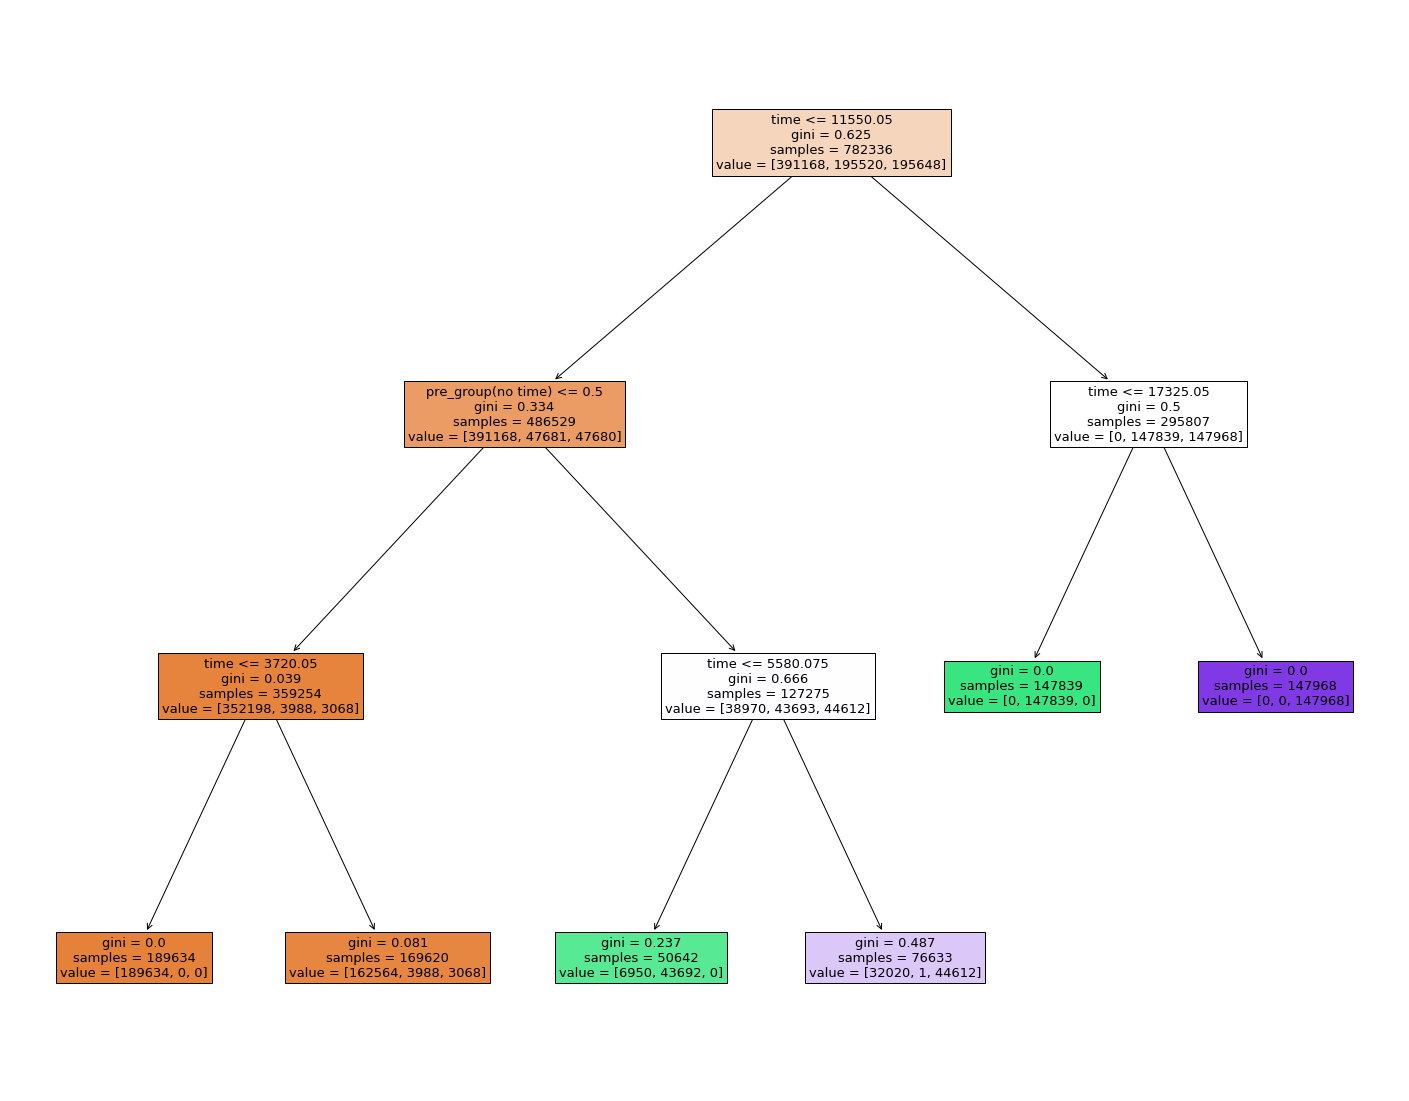

In [204]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X_train.columns,
                   fontsize=13,
                   filled=True)

In [205]:
ans_train["pre_group(time)"] = y_train_predict
ans_test["pre_group(time)"] = y_test_predict

### step 2 train each class

#### 1. class 0

In [207]:
X_train = one_train[one_train["time_group"]==0].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test[one_test["time_group"]==0].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train[one_train["time_group"]==0]["RUL_x"]
y_test = one_test[one_test["time_group"]==0]["RUL_x"]

In [208]:
X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

In [209]:
X_train.columns

Index(['sd_vert', 'rms_horiz', 'f16', 'av_sum', 'sd_temp', 'sd_sum',
       'sd_horiz', 'rms_vert', 'rms_sum', 'peak_temp', 'peak_sum', 'f80', 'f8',
       'f48', 'f40', 'f24', 'av_temp', 'shape_sum', 'rms_temp', 'f96',
       'f88_vert', 'f72', 'f56', 'f32', 'f184', 'f168', 'f120', 'f112_vert',
       'f112', 'f104', 'crest_sum', 'Rtd sensor', 'skew_temp', 'kurt_temp',
       'imp_temp', 'imp_sum', 'f88_sum', 'f88', 'f80_vert', 'f24_vert', 'f240',
       'f216', 'f208', 'f16_vert', 'f160', 'f136_vert', 'f136_sum', 'f136',
       'f120_vert', 'f120_sum', 'f112_sum', 'crest_temp', 'clear_temp',
       'clear_sum'],
      dtype='object')

In [210]:
from lightgbm import LGBMRegressor

In [211]:
lgb = LGBMRegressor(n_estimators=20,n_jobs=- 1,reg_lambda=0.5)
lgb.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.5, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [213]:
from sklearn.metrics import mean_absolute_error

In [214]:
y_test_predict = lgb.predict(X_test)
y_train_predict = lgb.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 3591088.898, MSE testing: 120614196.034
RMSE training: 1895.017, RMSE testing: 10982.449
MAE training: 1409.255, MAE testing: 9648.837


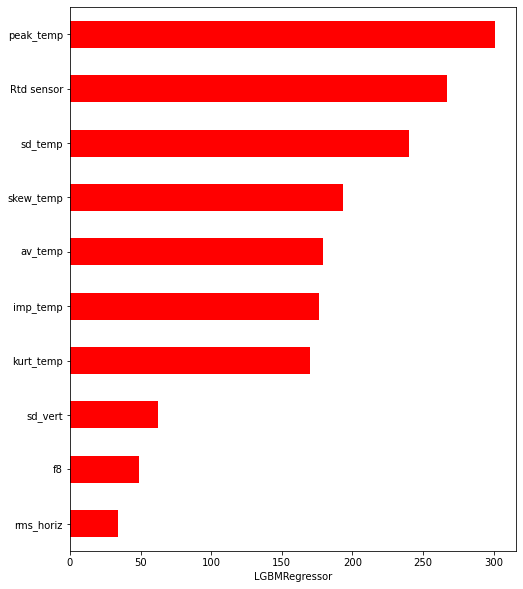

In [215]:
plot_features_weights('LGBMRegressor',rf.feature_importances_, X_train.columns)

In [216]:
X_real_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)
X_real_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)

In [217]:
X_real_train = X_real_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_real_test = X_real_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

In [218]:
y_test_predict_all = lgb.predict(X_real_test)
y_train_predict_all = lgb.predict(X_real_train)

In [219]:
ans_train["class 0 predict"] = y_train_predict_all
ans_test["class 0 predict"] = y_test_predict_all

#### 2. class 1

In [220]:
X_train = one_train[one_train["time_group"]==1].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test[one_test["time_group"]==1].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train[one_train["time_group"]==1]["RUL_x"]
y_test = one_test[one_test["time_group"]==1]["RUL_x"]

In [221]:
X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

In [222]:
X_train.columns

Index(['sd_vert', 'rms_horiz', 'f16', 'av_sum', 'sd_temp', 'sd_sum',
       'sd_horiz', 'rms_vert', 'rms_sum', 'peak_temp', 'peak_sum', 'f80', 'f8',
       'f48', 'f40', 'f24', 'av_temp', 'shape_sum', 'rms_temp', 'f96',
       'f88_vert', 'f72', 'f56', 'f32', 'f184', 'f168', 'f120', 'f112_vert',
       'f112', 'f104', 'crest_sum', 'Rtd sensor', 'skew_temp', 'kurt_temp',
       'imp_temp', 'imp_sum', 'f88_sum', 'f88', 'f80_vert', 'f24_vert', 'f240',
       'f216', 'f208', 'f16_vert', 'f160', 'f136_vert', 'f136_sum', 'f136',
       'f120_vert', 'f120_sum', 'f112_sum', 'crest_temp', 'clear_temp',
       'clear_sum'],
      dtype='object')

In [223]:
lgb = LGBMRegressor(n_estimators=20,n_jobs=- 1,reg_lambda=0.5)
lgb.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.5, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [224]:
y_test_predict = lgb.predict(X_test)
y_train_predict = lgb.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 554687.837, MSE testing: 526751.893
RMSE training: 744.774, RMSE testing: 725.777
MAE training: 628.202, MAE testing: 643.530


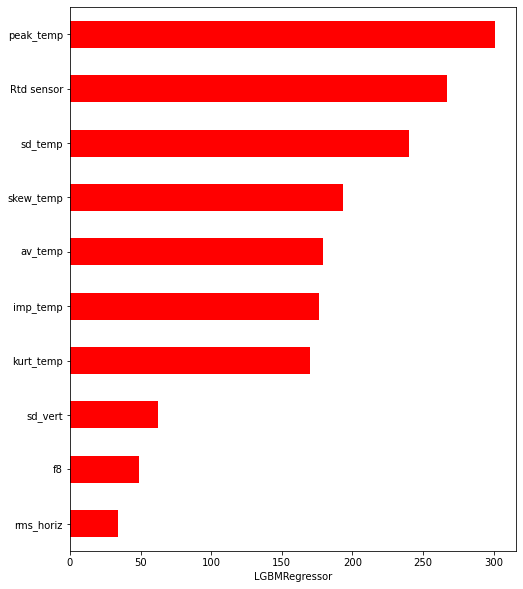

In [225]:
plot_features_weights('LGBMRegressor',rf.feature_importances_, X_train.columns)

In [226]:
X_real_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)
X_real_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)

X_real_train = X_real_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_real_test = X_real_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

y_test_predict_all = lgb.predict(X_real_test)
y_train_predict_all = lgb.predict(X_real_train)

ans_train["class 1 predict"] = y_train_predict_all
ans_test["class 1 predict"] = y_test_predict_all

#### 3. class 2

In [239]:
X_train = one_train[one_train["time_group"]==2].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test[one_test["time_group"]==2].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train[one_train["time_group"]==2]["RUL_x"]
y_test = one_test[one_test["time_group"]==2]["RUL_x"]

In [240]:
X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_train.columns

Index(['sd_vert', 'rms_horiz', 'f16', 'av_sum', 'sd_temp', 'sd_sum',
       'sd_horiz', 'rms_vert', 'rms_sum', 'peak_temp', 'peak_sum', 'f80', 'f8',
       'f48', 'f40', 'f24', 'av_temp', 'shape_sum', 'rms_temp', 'f96',
       'f88_vert', 'f72', 'f56', 'f32', 'f184', 'f168', 'f120', 'f112_vert',
       'f112', 'f104', 'crest_sum', 'Rtd sensor', 'skew_temp', 'kurt_temp',
       'imp_temp', 'imp_sum', 'f88_sum', 'f88', 'f80_vert', 'f24_vert', 'f240',
       'f216', 'f208', 'f16_vert', 'f160', 'f136_vert', 'f136_sum', 'f136',
       'f120_vert', 'f120_sum', 'f112_sum', 'crest_temp', 'clear_temp',
       'clear_sum'],
      dtype='object')

In [241]:
lgb = LGBMRegressor(n_estimators=20,n_jobs=- 1,reg_lambda=0.5)
lgb.fit(X_train, y_train)
y_test_predict = lgb.predict(X_test)
y_train_predict = lgb.predict(X_train)

In [242]:
train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 1177898.972, MSE testing: 416031.996
RMSE training: 1085.311, RMSE testing: 645.005
MAE training: 844.279, MAE testing: 557.316


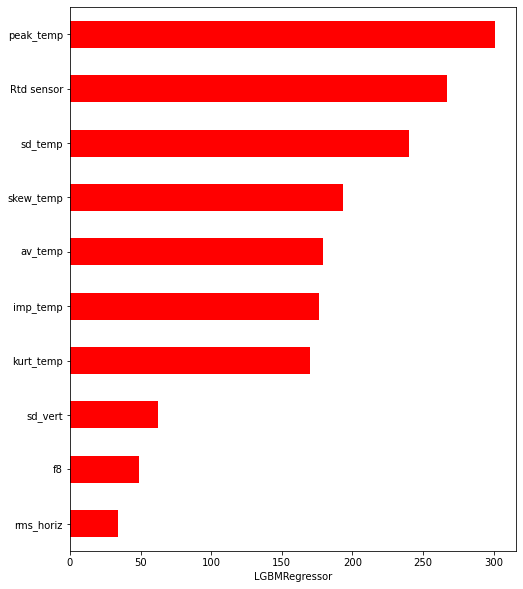

In [243]:
plot_features_weights('LGBMRegressor',rf.feature_importances_, X_train.columns)

In [244]:
X_real_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)
X_real_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)

X_real_train = X_real_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_real_test = X_real_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

y_test_predict_all = lgb.predict(X_real_test)
y_train_predict_all = lgb.predict(X_real_train)

ans_train["class 2 predict"] = y_train_predict_all
ans_test["class 2 predict"] = y_test_predict_all

In [245]:
ans_train

,real group,pre_group(no time),real_rul,time,pre_group(time),class 0 predict,class 1 predict,class 2 predict
0,0.0,0.0,7440.09961,0.00000,0.0,8232.840129,3144.222064,1578.865671
1,0.0,0.0,7440.09922,0.00039,0.0,8232.840129,3144.222064,1578.865671
2,0.0,0.0,7440.09883,0.00078,0.0,8232.840129,3144.222064,1578.865671
3,0.0,0.0,7440.09844,0.00117,0.0,8232.840129,3144.222064,1578.865671
4,0.0,0.0,7440.09805,0.00156,0.0,8232.840129,3144.222064,1578.865671
...,...,...,...,...,...,...,...,...
782331,2.0,2.0,0.00156,23100.09805,2.0,16608.066927,6358.232971,1478.569388
782332,2.0,2.0,0.00117,23100.09844,2.0,16608.066927,6358.232971,1478.569388
782333,2.0,2.0,0.00078,23100.09883,2.0,16608.066927,6358.232971,1367.860056
782334,2.0,2.0,0.00039,23100.09922,2.0,16608.066927,6358.232971,1335.106109


In [246]:
ans_train = ans_train.reset_index()
ans_test = ans_test.reset_index()

In [247]:
ans_train.loc[ans_train["pre_group(no time)"]==0,"final predict"] = ans_train.loc[ans_train["pre_group(no time)"]==0,"class 0 predict"]
ans_train.loc[ans_train["pre_group(no time)"]==1,"final predict"] = ans_train.loc[ans_train["pre_group(no time)"]==1,"class 1 predict"]
ans_train.loc[ans_train["pre_group(no time)"]==2,"final predict"] = ans_train.loc[ans_train["pre_group(no time)"]==2,"class 2 predict"]

In [248]:
ans_test.loc[ans_test["pre_group(no time)"]==0,"final predict"] = ans_test.loc[ans_test["pre_group(no time)"]==0,"class 0 predict"]
ans_test.loc[ans_test["pre_group(no time)"]==1,"final predict"] = ans_test.loc[ans_test["pre_group(no time)"]==1,"class 1 predict"]
ans_test.loc[ans_test["pre_group(no time)"]==2,"final predict"] = ans_test.loc[ans_test["pre_group(no time)"]==2,"class 2 predict"]

In [249]:
ans_train

,index,real group,pre_group(no time),real_rul,time,pre_group(time),class 0 predict,class 1 predict,class 2 predict,final predict
0,0,0.0,0.0,7440.09961,0.00000,0.0,8232.840129,3144.222064,1578.865671,8232.840129
1,1,0.0,0.0,7440.09922,0.00039,0.0,8232.840129,3144.222064,1578.865671,8232.840129
2,2,0.0,0.0,7440.09883,0.00078,0.0,8232.840129,3144.222064,1578.865671,8232.840129
3,3,0.0,0.0,7440.09844,0.00117,0.0,8232.840129,3144.222064,1578.865671,8232.840129
4,4,0.0,0.0,7440.09805,0.00156,0.0,8232.840129,3144.222064,1578.865671,8232.840129
...,...,...,...,...,...,...,...,...,...,...
782331,782331,2.0,2.0,0.00156,23100.09805,2.0,16608.066927,6358.232971,1478.569388,1478.569388
782332,782332,2.0,2.0,0.00117,23100.09844,2.0,16608.066927,6358.232971,1478.569388,1478.569388
782333,782333,2.0,2.0,0.00078,23100.09883,2.0,16608.066927,6358.232971,1367.860056,1367.860056
782334,782334,2.0,2.0,0.00039,23100.09922,2.0,16608.066927,6358.232971,1335.106109,1335.106109


In [250]:
ans_train.loc[ans_train["pre_group(time)"]==0,"final predict(time)"] = ans_train.loc[ans_train["pre_group(time)"]==0,"class 0 predict"]
ans_train.loc[ans_train["pre_group(time)"]==1,"final predict(time)"] = ans_train.loc[ans_train["pre_group(time)"]==1,"class 1 predict"]
ans_train.loc[ans_train["pre_group(time)"]==2,"final predict(time)"] = ans_train.loc[ans_train["pre_group(time)"]==2,"class 2 predict"]

In [251]:
ans_test.loc[ans_test["pre_group(time)"]==0,"final predict(time)"] = ans_test.loc[ans_test["pre_group(time)"]==0,"class 0 predict"]
ans_test.loc[ans_test["pre_group(time)"]==1,"final predict(time)"] = ans_test.loc[ans_test["pre_group(time)"]==1,"class 1 predict"]
ans_test.loc[ans_test["pre_group(time)"]==2,"final predict(time)"] = ans_test.loc[ans_test["pre_group(time)"]==2,"class 2 predict"]

In [252]:
train_mse = mean_squared_error(ans_train["real_rul"], ans_train["final predict"])
test_mse = mean_squared_error(ans_test["real_rul"], ans_test["final predict"])
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(ans_train["real_rul"], ans_train["final predict"])
test_mape = mean_absolute_error(ans_test["real_rul"], ans_test["final predict"])
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 14946360.270, MSE testing: 191003343.665
RMSE training: 3866.052, RMSE testing: 13820.396
MAE training: 2299.707, MAE testing: 12875.238


In [253]:
train_mse = mean_squared_error(ans_train["real_rul"], ans_train["final predict(time)"])
test_mse = mean_squared_error(ans_test["real_rul"], ans_test["final predict(time)"])
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(ans_train["real_rul"], ans_train["final predict(time)"])
test_mape = mean_absolute_error(ans_test["real_rul"], ans_test["final predict(time)"])
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 11081494.729, MSE testing: 191003319.206
RMSE training: 3328.888, RMSE testing: 13820.395
MAE training: 1706.974, MAE testing: 12875.231


In [254]:
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["RUL_x"]
y_test = one_test["RUL_x"]

X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

X_train.columns

Index(['sd_vert', 'rms_horiz', 'f16', 'av_sum', 'sd_temp', 'sd_sum',
       'sd_horiz', 'rms_vert', 'rms_sum', 'peak_temp', 'peak_sum', 'f80', 'f8',
       'f48', 'f40', 'f24', 'av_temp', 'shape_sum', 'rms_temp', 'f96',
       'f88_vert', 'f72', 'f56', 'f32', 'f184', 'f168', 'f120', 'f112_vert',
       'f112', 'f104', 'crest_sum', 'Rtd sensor', 'skew_temp', 'kurt_temp',
       'imp_temp', 'imp_sum', 'f88_sum', 'f88', 'f80_vert', 'f24_vert', 'f240',
       'f216', 'f208', 'f16_vert', 'f160', 'f136_vert', 'f136_sum', 'f136',
       'f120_vert', 'f120_sum', 'f112_sum', 'crest_temp', 'clear_temp',
       'clear_sum'],
      dtype='object')

In [255]:
lgb = LGBMRegressor(n_estimators=20,n_jobs=- 1,reg_lambda=0.5)
lgb.fit(X_train, y_train)

y_test_predict = lgb.predict(X_test)
y_train_predict = lgb.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 14020790.247, MSE testing: 190753735.036
RMSE training: 3744.435, RMSE testing: 13811.363
MAE training: 2870.178, MAE testing: 12927.630


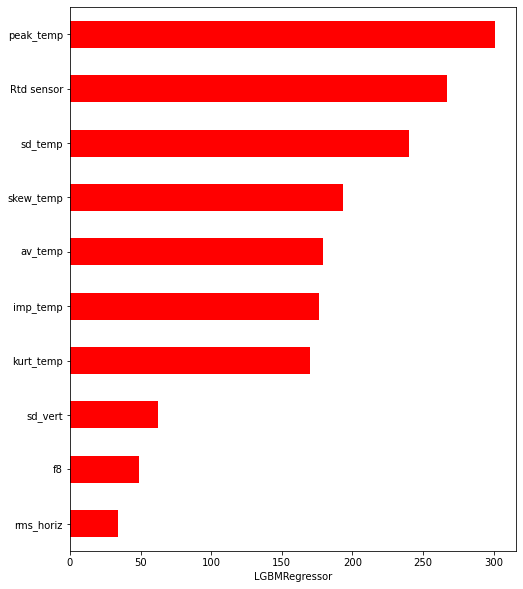

In [256]:
plot_features_weights('LGBMRegressor',rf.feature_importances_, X_train.columns)

In [49]:
ans_df = pd.DataFrame(y_train)

In [50]:
ans_df["rf_predict"] = y_train_predict

In [67]:

train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MAE training: 4385.278, MAE testing: 5756.707


In [73]:
y_train = ans_df[ans_df["RUL"]<500]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]<500]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MAE training: 1040.631, MAE testing: 5756.707


In [63]:
y_train = ans_df[ans_df["RUL"]<10000]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]<10000]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MAE training: 3904.573, MAE testing: 5756.707


In [68]:
y_train = ans_df[ans_df["RUL"]>10000]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]>10000]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MAE training: 4883.032, MAE testing: 5756.707


In [61]:
ans_df[ans_df["RUL"]>10000]

,RUL,rf_predict
0,28020.099605,15356.027831
1,28020.099214,15176.099507
2,28020.098824,16848.654019
3,28020.098433,16848.654019
4,28020.098042,15657.801022
...,...,...
543227,28072.201560,7309.972206
543228,28072.201170,7266.249676
543229,28072.200780,6636.463772
543230,28072.200390,6423.953280


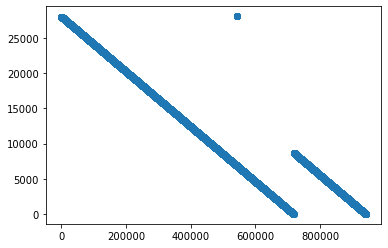

In [60]:
plt.scatter(ans_df.index,ans_df["RUL"])

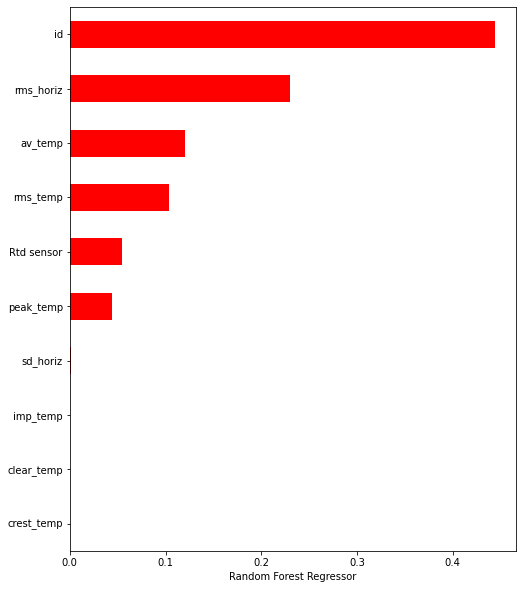

In [58]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns)

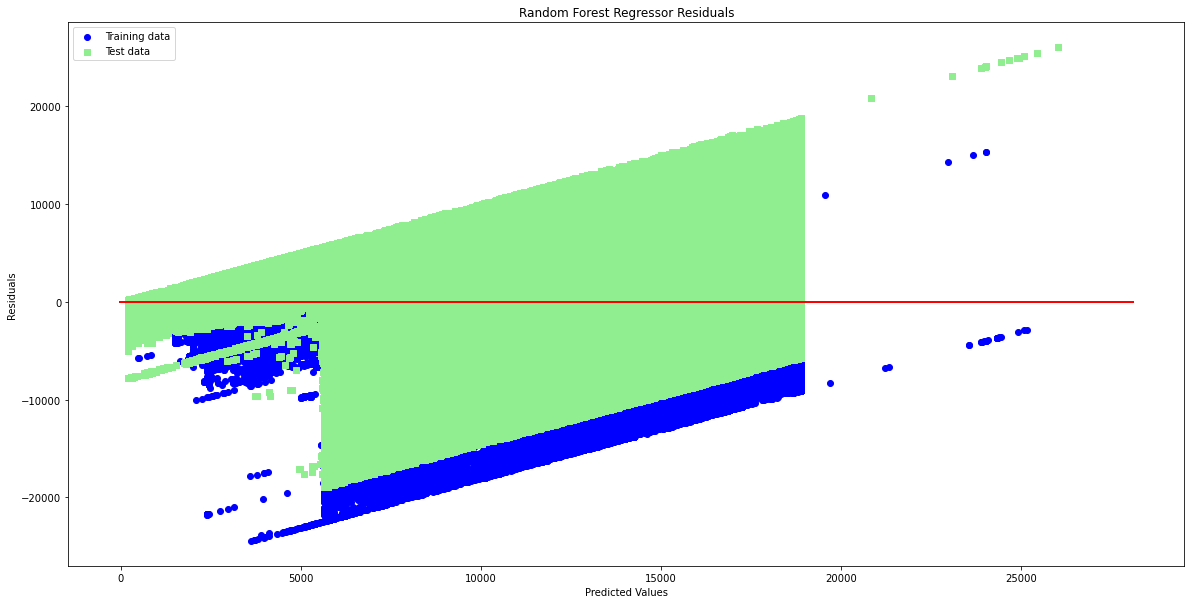

In [46]:
plot_residual('Random Forest Regressor',y_train, y_train_predict, y_test, y_test_predict)

In [150]:
y_train

0         28020.099605
1         28020.099214
2         28020.098824
3         28020.098433
4         28020.098042
              ...     
940538        0.001560
940539        0.001170
940540        0.000780
940541        0.000390
940542        0.000000
Name: RUL, Length: 940543, dtype: float64

In [149]:
y_train_predict 

array([15090.69924777, 14191.4132257 , 16939.07715585, ...,
         183.10801738,   183.10801738,   183.10801738])

In [36]:
X_train.isnull().values.any()

False

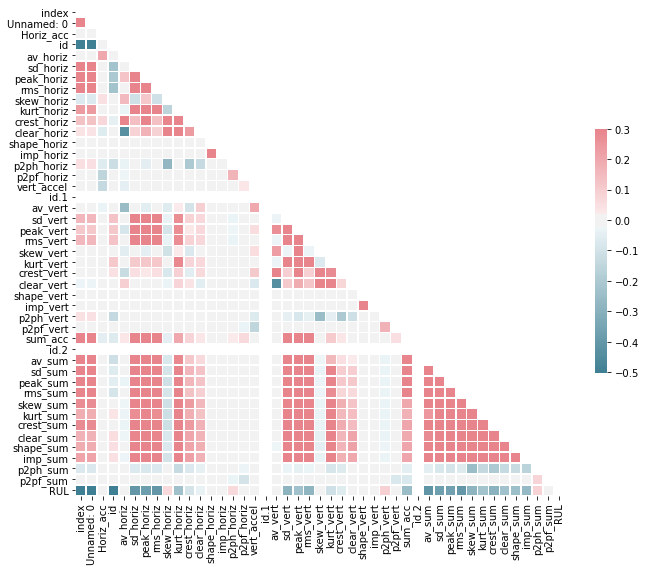

In [75]:
# 計算相關係數
corr = one_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

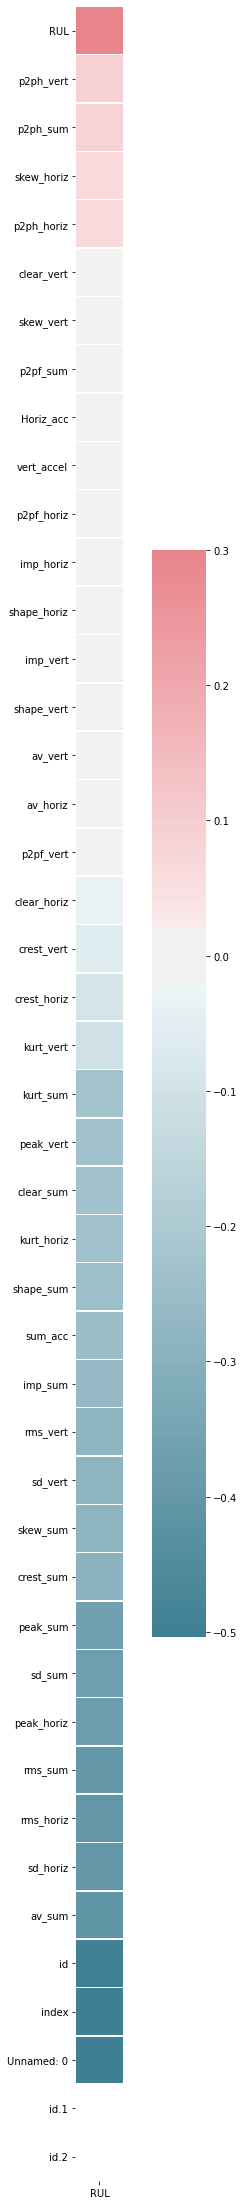

In [90]:
plt.figure(figsize=(10,40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pd.DataFrame(corr["RUL"].sort_values(ascending=False)), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

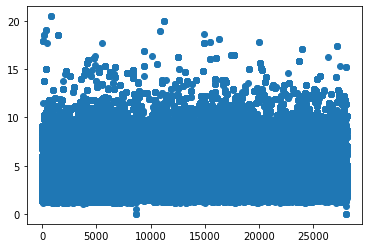

In [93]:
plt.scatter(one_train["RUL"],one_train["p2ph_vert"])

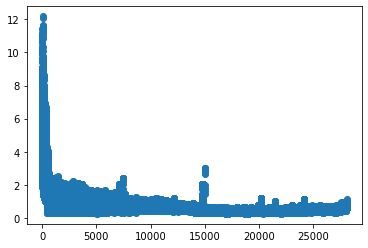

In [94]:
plt.scatter(one_train["RUL"],one_train["av_sum"])